### IMPORTS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### INPUT AND OUTPUT

In [2]:
# ----- #
# INPUT #
# ----- #
with open('../config/repository_path.txt', 'r') as reader:
    repository_path = reader.read().strip()

results_file = os.path.join(repository_path, 'results', 'ranking_function_simulations.csv')
assert os.path.isfile(results_file)

### Original Data

In [3]:
df = pd.read_csv(results_file)
df.shape

(420, 39)

### Average Data

In [5]:
average_data= {'N': [],
               'n': [],
               'Ranking Function': [],
               'Effort': []
              }
metrics = ['Precision (training)',
           'Recall (training)',
           'F1-Score (training)',
           'Precision (test)',
           'Recall (test)',
           'F1-Score (test)',
           'Precision (held-out)',
           'Recall (held-out)',
           'F1-Score (held-out)',
          ]
for metric in metrics:
    average_data[metric]=[]
    
for (N,n,ranking_function),auxdf in list(df.groupby(['N', 'n', 'Ranking Function'])):
    average_data['Ranking Function'].append(ranking_function)
    average_data['N'].append(N)
    average_data['n'].append(n)
    
    total_effort=auxdf['Effort'].iloc[0]
    assert len(set(auxdf['Effort']))==1
    average_data['Effort'].append(total_effort)
    
    for metric in metrics:
        assert len(auxdf[metric])==3
#         assert 0<len(auxdf[metric]) and len(auxdf[metric])<=3
        average_data[metric].append(np.average(auxdf[metric]))
average_df = pd.DataFrame(average_data)
average_df

,N,n,Ranking Function,Effort,Precision (training),Recall (training),F1-Score (training),Precision (test),Recall (test),F1-Score (test),Precision (held-out),Recall (held-out),F1-Score (held-out)
0,291,1,half_and_half,21,0.712121,1.000000,0.828321,0.089322,1.000000,0.163995,0.082361,1.000000,0.152188
1,291,1,random,21,0.484848,1.000000,0.652778,0.090183,1.000000,0.165446,0.082361,1.000000,0.152188
2,291,1,relevance,21,0.727273,1.000000,0.842105,0.089264,1.000000,0.163898,0.082361,1.000000,0.152188
3,291,1,uncertainty,21,0.727273,1.000000,0.841570,0.089264,1.000000,0.163898,0.082361,1.000000,0.152188
4,291,3,half_and_half,60,0.729091,1.000000,0.843265,0.085373,1.000000,0.157315,0.082665,1.000000,0.152706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,5825,10,uncertainty,445,0.652619,0.997967,0.789084,0.528404,0.961082,0.680965,0.544516,0.958333,0.693568
136,5825,20,half_and_half,810,0.779264,0.966830,0.862858,0.645305,0.789918,0.709368,0.670359,0.858333,0.752650
137,5825,20,random,810,0.098687,1.000000,0.179550,0.090553,1.000000,0.166065,0.082361,1.000000,0.152188
138,5825,20,relevance,810,0.783595,0.957731,0.861655,0.670154,0.764464,0.707553,0.692578,0.855556,0.764294


### Plots

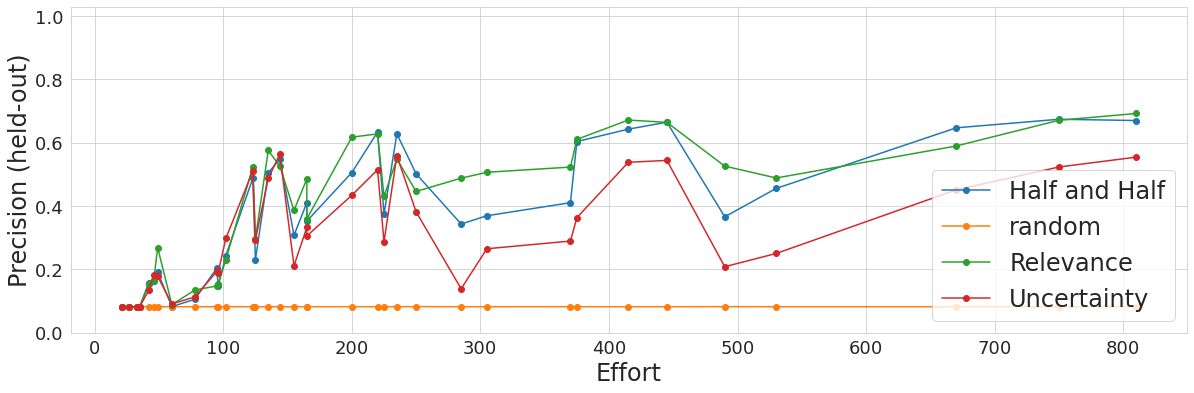

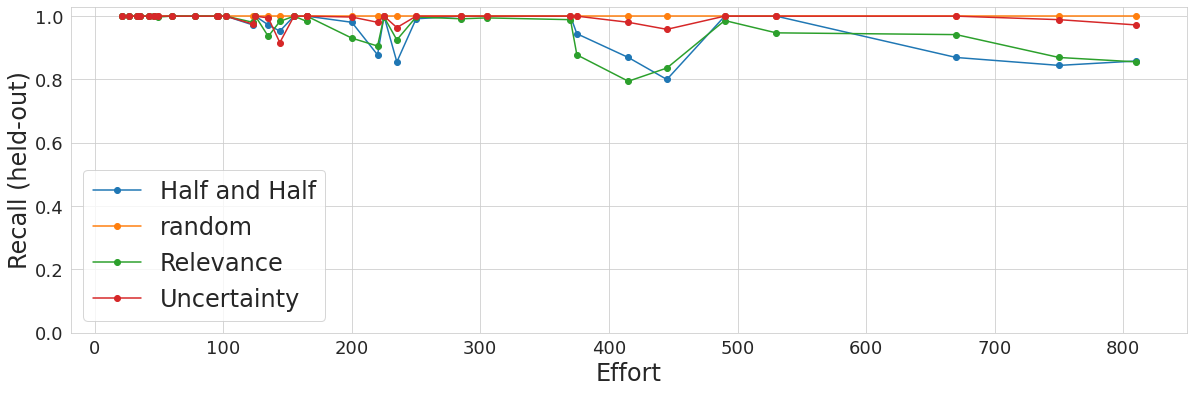

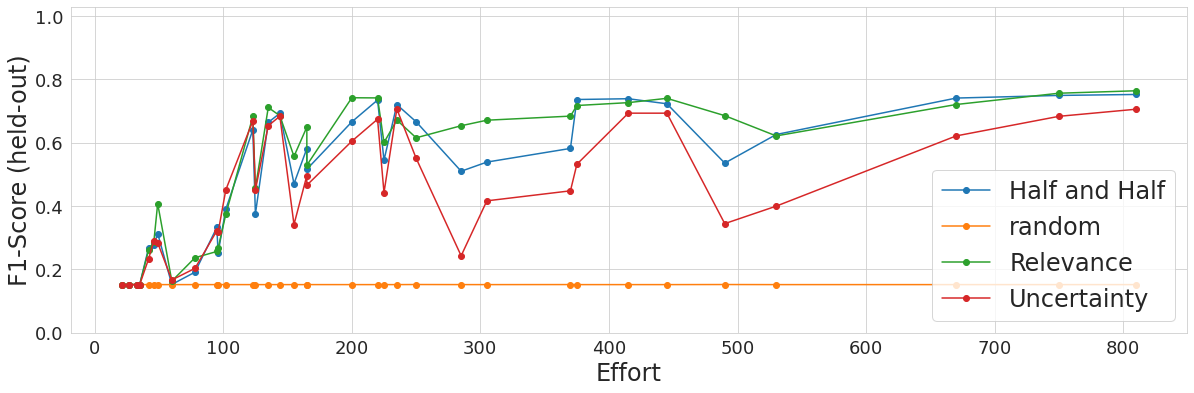

In [6]:
x_axis = 'Effort'

rf2label = {'relevance': 'Relevance', 'half_and_half': 'Half and Half', 'random': 'random', 'uncertainty': 'Uncertainty'}

sns.set_style('whitegrid')
for metric in ['Precision (held-out)', 'Recall (held-out)', 'F1-Score (held-out)']:
# for metric in ['Precision (test)', 'Recall (test)', 'F1-Score (test)']:
    fig, ax = plt.subplots(1, figsize=(20,6))
    for ranking_function in set(average_df['Ranking Function']):
        auxdf = average_df[average_df['Ranking Function']==ranking_function]
        auxdf=auxdf.sort_values(by='Effort')
        x = auxdf['Effort']
        y = auxdf[metric]
        ax.plot(x,y, label=rf2label[ranking_function], marker='o')

    ax.set_ylim(0,1.03)
    ax.set_xlabel(x_axis, fontsize=24)
    ax.set_ylabel(metric, fontsize=24)
    ax.legend(fontsize=24)

    ax.tick_params(axis='both', which='major', labelsize=18)
    fig.savefig(os.path.join(repository_path, 'results', 'figures', f'dp_ranking_function_simulation_figures_{metric}.jpg'), bbox_inches='tight')


